<a href="https://colab.research.google.com/github/BaileyMeche/Econometrics/blob/main/DifferenceinDifferences.py" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Difference-in-Differences

In [ ]:
!pip install causaldata

In [ ]:
pip install linearmodels

## Two-way fixed effects

Kessler and Roth organ donation study discussed earlier with clustered fixed effects applied at the state level

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import linearmodels as lm
from causaldata import organ_donations

Create the variable columns we need

In [ ]:
od = organ_donations.load_pandas().data

# Create Treatment Variable
od['California'] = od['State'] == 'California'
od['After'] = od['Quarter_Num'] > 3
od['Treated'] = 1*(od['California'] & od['After'])
# Set our individual and time (index) for our data
od = od.set_index(['State','Quarter_Num'])

In [ ]:
#Visualizing the data:
od

Quarter    Rate  California  After  Treated
State   Quarter_Num                                            
Alaska  1            Q42010  0.7500       False  False        0
        2            Q12011  0.7700       False  False        0
        3            Q22011  0.7700       False  False        0
        4            Q32011  0.7800       False   True        0
        5            Q42011  0.7800       False   True        0
...                     ...     ...         ...    ...      ...
Wyoming 2            Q12011  0.5946       False  False        0
        3            Q22011  0.5937       False  False        0
        4            Q32011  0.5911       False   True        0
        5            Q42011  0.5854       False   True        0
        6            Q12012  0.5881       False   True        0

[162 rows x 5 columns]

In [ ]:



mod = lm.PanelOLS.from_formula('''Rate ~
Treated + EntityEffects + TimeEffects''',od)

# Specify clustering when we fit the model
clfe = mod.fit(cov_type = 'clustered',
cluster_entity = True)
print(clfe)

                          PanelOLS Estimation Summary                           
Dep. Variable:                   Rate   R-squared:                        0.0092
Estimator:                   PanelOLS   R-squared (Between):             -0.0010
No. Observations:                 162   R-squared (Within):              -0.0021
Date:                Thu, Nov 02 2023   R-squared (Overall):             -0.0010
Time:                        03:36:08   Log-likelihood                    388.57
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      1.2006
Entities:                          27   P-value                           0.2752
Avg Obs:                       6.0000   Distribution:                   F(1,129)
Min Obs:                       6.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             11.525
                            

In [ ]:
clfe.params

Treated   -0.022459
Name: parameter, dtype: float64

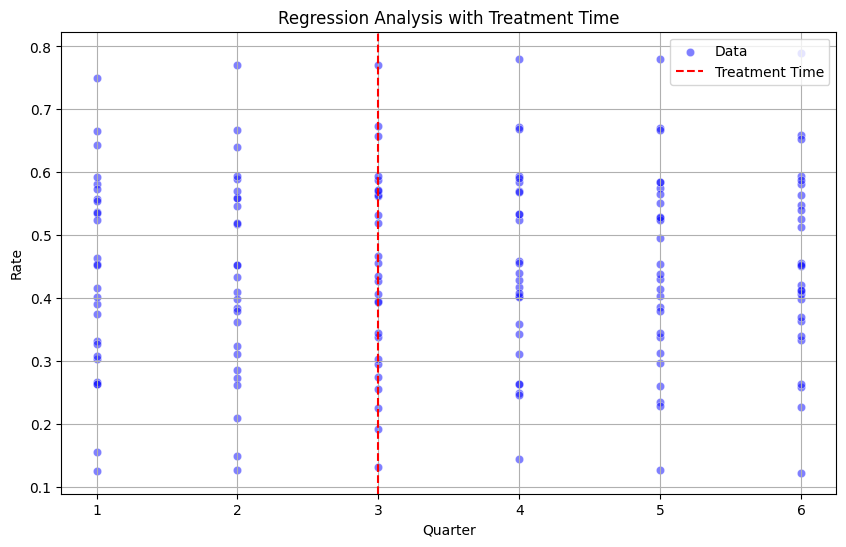

In [ ]:
  plt.figure(figsize=(10, 6))
  sns.scatterplot(x='Quarter_Num', y='Rate', data=od, label='Data', color='blue', alpha=0.5)
  plt.axvline(x=3, color='red', linestyle='--', label='Treatment Time')
  plt.xlabel('Quarter')
  plt.ylabel('Rate')
  plt.legend()
  plt.title('Regression Analysis with Treatment Time')
  plt.grid()
  plt.show()

Table 18.2 shows the result of this two-way fixed effects regression, with the fixed effects themselves excluded from the table and only the coefficient on the `Treated`
 variable (“treated-group” and “after-treatment” interacted) shown. Notice at the bottom of the table a row each for the state and quarter fixed effects. The “X” here just indicates that the fixed effects are included. It’s fairly common to skip reporting the actual fixed effects - there are so many of them!

The coefficient is **-0.022** with a standard error of .006. From this we can say that the introduction of active-choice phrasing in California saw a reduction in organ donation rates that was .022 (or 2.2 percentage points) larger in California than it was in the untreated states. The standard error is .006, so we have a t-statistic of **-0.22/0.006 = 3.67**, which is high enough to be considered statistically significant at the 99% level. We can reject the null that the DID estimate is 0.

## Supporting the Parallel Trends Assumption


In [ ]:
import linearmodels as lm
from causaldata import organ_donations
od = organ_donations.load_pandas().data

# Keep only pre-treatment data
od = od.loc[od['Quarter_Num'] <= 3]

# Create fake treatment variables
od['California'] = od['State'] == 'California'
od['FakeAfter1'] = od['Quarter_Num'] > 1
od['FakeAfter2'] = od['Quarter_Num'] > 2
od['FakeTreat1'] = 1*(od['California'] & od['FakeAfter1'])
od['FakeTreat2'] = 1*(od['California'] & od['FakeAfter2'])

# Set our individual and time (index) for our data
od = od.set_index(['State','Quarter_Num'])

# Run the same model as before
# but with our fake treatment variables
mod1 = lm.PanelOLS.from_formula('''Rate ~
FakeTreat1 + EntityEffects + TimeEffects''',od)
mod2 = lm.PanelOLS.from_formula('''Rate ~
FakeTreat2 + EntityEffects + TimeEffects''',od)

clfe1 = mod1.fit(cov_type = 'clustered',
cluster_entity = True)
clfe2 = mod1.fit(cov_type = 'clustered',
cluster_entity = True)

<ipython-input-7-d7ce3cab5625>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  od['California'] = od['State'] == 'California'
<ipython-input-7-d7ce3cab5625>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  od['FakeAfter1'] = od['Quarter_Num'] > 1
<ipython-input-7-d7ce3cab5625>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

<ipython-input-8-4b8d6877de42>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  od['California'] = od['State'] == 'California'
<ipython-input-8-4b8d6877de42>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  od['FakeAfter1'] = od['Quarter_Num'] > 1
<ipython-input-8-4b8d6877de42>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

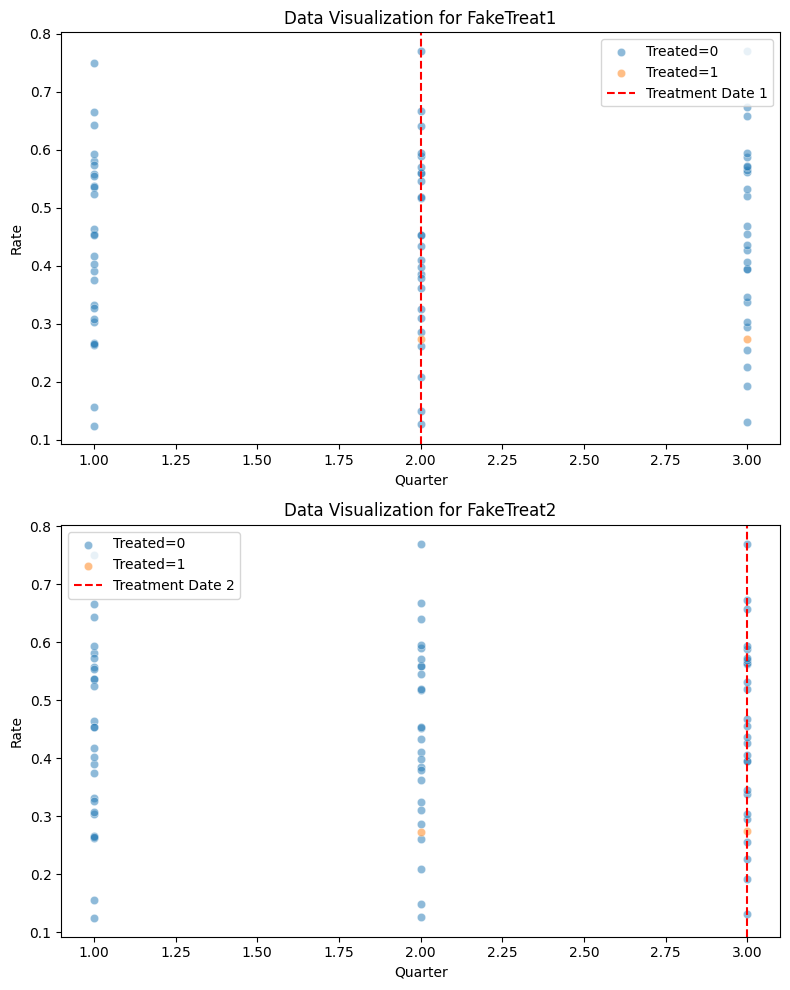

In [ ]:
import linearmodels as lm
from causaldata import organ_donations
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
od = organ_donations.load_pandas().data

# Keep only pre-treatment data
od = od.loc[od['Quarter_Num'] <= 3]

# Create fake treatment variables
od['California'] = od['State'] == 'California'
od['FakeAfter1'] = od['Quarter_Num'] > 1
od['FakeAfter2'] = od['Quarter_Num'] > 2
od['FakeTreat1'] = 1 * (od['California'] & od['FakeAfter1'])
od['FakeTreat2'] = 1 * (od['California'] & od['FakeAfter2'])

# Set our individual and time (index) for our data
od = od.set_index(['State', 'Quarter_Num'])

# Create two separate dataframes for treated=0 and treated=1
od_treated_0 = od[od['FakeTreat1'] == 0]
od_treated_1 = od[od['FakeTreat1'] == 1]

# Create two plots with different treatment dates
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# Plot for FakeTreat1
sns.scatterplot(x='Quarter_Num', y='Rate', data=od_treated_0.reset_index(), label='Treated=0', ax=axes[0], alpha=0.5)
sns.scatterplot(x='Quarter_Num', y='Rate', data=od_treated_1.reset_index(), label='Treated=1', ax=axes[0], alpha=0.5)
axes[0].axvline(x=2, color='red', linestyle='--', label='Treatment Date 1')
axes[0].set_xlabel('Quarter')
axes[0].set_ylabel('Rate')
axes[0].legend()
axes[0].set_title('Data Visualization for FakeTreat1')

# Plot for FakeTreat2
sns.scatterplot(x='Quarter_Num', y='Rate', data=od_treated_0.reset_index(), label='Treated=0', ax=axes[1], alpha=0.5)
sns.scatterplot(x='Quarter_Num', y='Rate', data=od_treated_1.reset_index(), label='Treated=1', ax=axes[1], alpha=0.5)
axes[1].axvline(x=3, color='red', linestyle='--', label='Treatment Date 2')
axes[1].set_xlabel('Quarter')
axes[1].set_ylabel('Rate')
axes[1].legend()
axes[1].set_title('Data Visualization for FakeTreat2')

plt.tight_layout()
plt.show()


In Table 18.3, we see that if we drop all data after the actual treatment (which occurs between the third and fourth period in the data), and then pretend that the treatment occurred either between the first and second, or second and third periods, we find no DID effect. That’s as it should be! There wasn’t actually a policy change there, so there shouldn’t be a DID effect.

In [ ]:
print(clfe1)
print(clfe2)

                          PanelOLS Estimation Summary                           
Dep. Variable:                   Rate   R-squared:                        0.0019
Estimator:                   PanelOLS   R-squared (Between):              0.0004
No. Observations:                  81   R-squared (Within):               0.0025
Date:                Thu, Nov 02 2023   R-squared (Overall):              0.0004
Time:                        03:36:09   Log-likelihood                    240.84
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      0.0979
Entities:                          27   P-value                           0.7556
Avg Obs:                       3.0000   Distribution:                    F(1,51)
Min Obs:                       3.0000                                           
Max Obs:                       3.0000   F-statistic (robust):             0.9733
                            

## Long-Term Effects


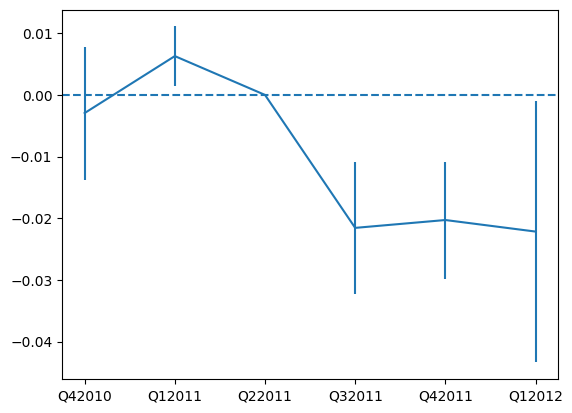

In [ ]:
import pandas as pd
import matplotlib as plt
import linearmodels as lm
from causaldata import organ_donations
od = organ_donations.load_pandas().data

# Create Treatment Variable
od['California'] = od['State'] == 'California'

# Create our interactions by hand,
# skipping quarter 3, the last one before treatment
for i in [1, 2, 4, 5, 6]:
    name = 'INX'+str(i)
    od[name] = 1*od['California']
    od.loc[od['Quarter_Num'] != i, name] = 0

# Set our individual and time (index) for our data
od = od.set_index(['State','Quarter_Num'])

mod = lm.PanelOLS.from_formula('''Rate ~
INX1 + INX2 + INX4 + INX5 + INX6 +
EntityEffects + TimeEffects''',od)

# Specify clustering when we fit the model
clfe = mod.fit(cov_type = 'clustered',
cluster_entity = True)

# Get coefficients and CIs
res = pd.concat([clfe.params, clfe.std_errors], axis = 1)
# Scale standard error to CI
res['ci'] = res['std_error']*1.96

# Add our quarter values
res['Quarter_Num'] = [1, 2, 4, 5, 6]
# And add our reference period back in
reference = pd.DataFrame([[0,0,0,3]],
columns = ['parameter',
            'lower',
            'upper',
            'Quarter_Num'])
res = pd.concat([res, reference])

# For plotting, sort and add labels
res = res.sort_values('Quarter_Num')
res['Quarter'] = ['Q42010','Q12011',
                    'Q22011','Q32011',
                    'Q42011','Q12012']

# Plot the estimates as connected lines with error bars

plt.pyplot.errorbar(x = 'Quarter', y = 'parameter',
                    yerr = 'ci', data = res)
# Add a horizontal line at 0
plt.pyplot.axhline(0, linestyle = 'dashed')

From Figure 18.6 we can see effects near zero in the three pre-treatment periods - always good, although the confidence interval for the first quarter of 2011 is above zero. That’s not ideal, but as I mentioned, a single dynamic effect behaving badly isn’t a reason to throw out the whole model or anything, especially when the deviation is fairly small in its actual value. We also see three similarly negative effects for the three periods after treatment goes into effect. The impact appears to be immediate and consistent, at least within the time window we’re looking at.